In [4]:
%matplotlib inline

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
from utils import lis, layers, min_distance, data_prepare

In [2]:
#coordinates = pd.read_csv('../data/coordinates.csv', ';', header=None, decimal=',')
#connections = pd.read_csv('../data/connect.csv', ';', header=None) - 1
#chip_1 = coordinates[:40].drop([0, 1], axis=1)
#chip_2 = coordinates[40:].drop([0, 1], axis=1)

In [3]:
chip_1, chip_2, connections = data_prepare()

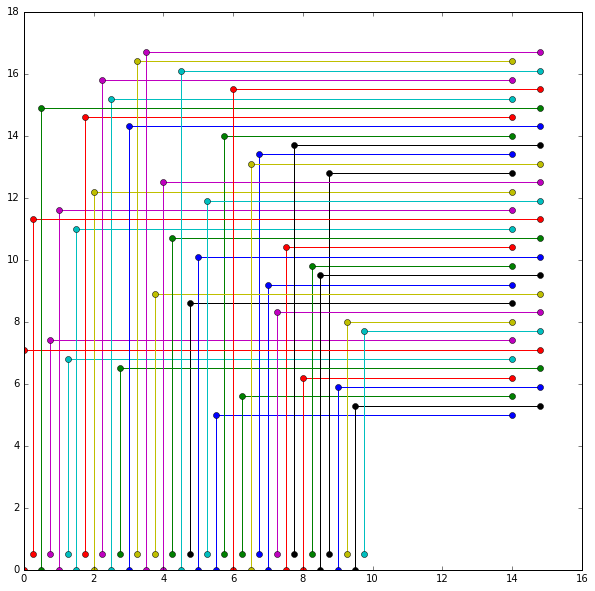

In [5]:
#experiments
plt.figure(figsize=[10, 10])
for connect in connections.values:
    if chip_2.values[connect[1]][0] < 14.5:
        plt.plot([chip_1.values[connect[0]][0], 
                  chip_1.values[connect[0]][0], 
                  chip_2.values[connect[1]][0]], 
                 [chip_1.values[connect[0]][1], 
                  chip_2.values[connect[1]][1], 
                  chip_2.values[connect[1]][1]], '-o')
    if chip_2.values[connect[1]][0] > 14.5:
        plt.plot([chip_1.values[connect[0]][0], 
                  chip_1.values[connect[0]][0], 
                  chip_2.values[connect[1]][0]], 
                 [chip_1.values[connect[0]][1], 
                  chip_2.values[connect[1]][1]+0.3,
                  chip_2.values[connect[1]][1]+0.3], '-o')

In [6]:
new_points, subsequences = layers(chip_1, chip_2, connections)

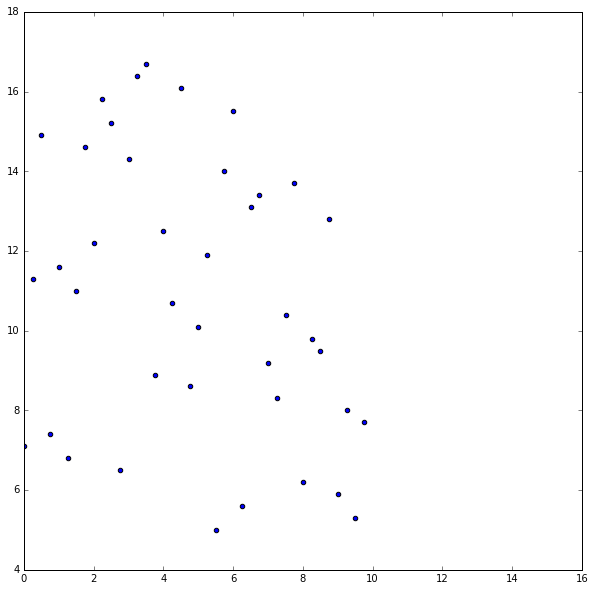

In [7]:
#experiments
plt.figure(figsize=[10, 10])
plt.xlim(0, 16)
plt.scatter(np.array(new_points).T[0], np.array(new_points).T[1])

In [8]:
#support computations
min_distance = 0.0
for i in connections.values:
    min_distance += np.sqrt(np.sum((chip_1.values[i[0]-1]-chip_2.values[i[1]-1])**2))
min_distance

576.0904186432706

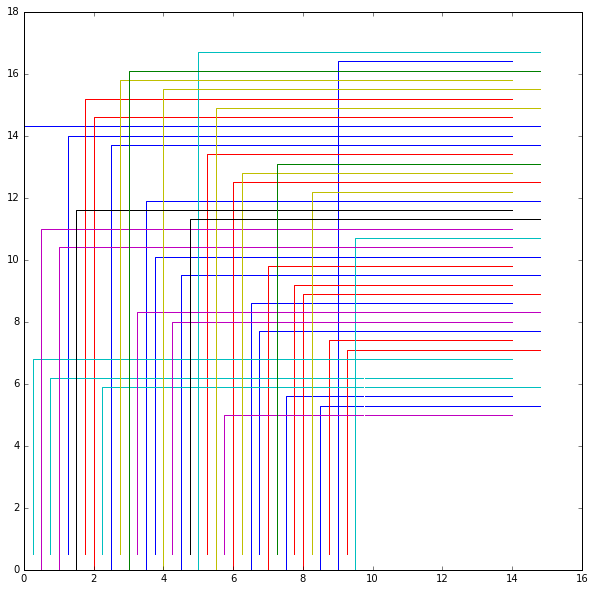

In [9]:
#experiments
color_list = ['b', 'r', 'c', 'm', 'y', 'k', 'g', 'w']

plt.figure(figsize=[10, 10])
for num, subseq in enumerate(subsequences):
    c = color_list[num]
    for connect in connections.values[subseq]:
        if chip_2.values[connect[1]-1][0] < 14.5:
            plt.plot([chip_1.values[connect[0]-1][0], 
                      chip_1.values[connect[0]-1][0], 
                      chip_2.values[connect[1]-1][0]], 
                     [chip_1.values[connect[0]-1][1], 
                      chip_2.values[connect[1]-1][1], 
                      chip_2.values[connect[1]-1][1]], color=c)
        if chip_2.values[connect[1]-1][0] > 14.5:
            plt.plot([chip_1.values[connect[0]-1][0], 
                      chip_1.values[connect[0]-1][0], 
                      chip_2.values[connect[1]-1][0]], 
                     [chip_1.values[connect[0]-1][1], 
                      chip_2.values[connect[1]-1][1]+0.3,
                      chip_2.values[connect[1]-1][1]+0.3], color=c)

In [11]:
subsequences

[[20, 21, 2, 25, 7, 28, 29, 32, 35, 16, 36],
 [24, 5, 27, 8, 9, 33, 15, 17, 18],
 [0, 22, 3, 4, 30],
 [1, 6, 26, 10, 11],
 [13, 14, 37, 38, 19],
 [31, 12],
 [34, 39],
 [23]]